# 1D conds

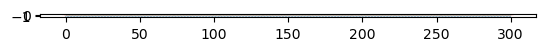

9.383860349655151


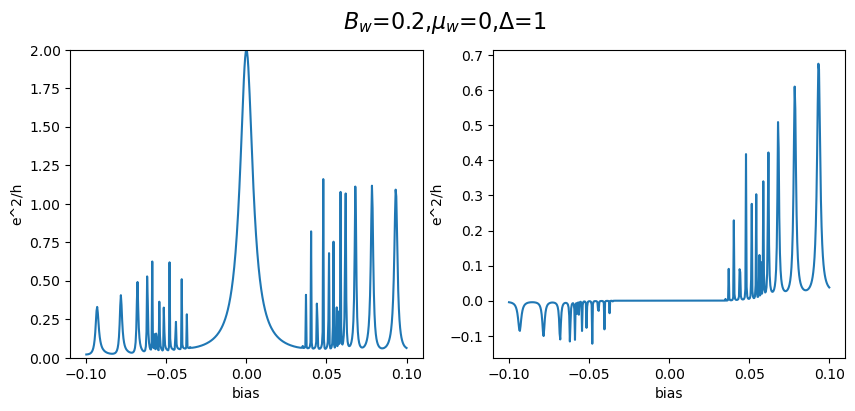

In [2]:
from full_system import*
import time
import matplotlib.pyplot as plt
# %matplotlib tk


params = {
    "L": 300,
    "alpha": 0.8,
    "Bw": 0.2,
    "mu_w": 0,
    "tw": 12,

    "Bs": 0,
    "mu_s": 0,
    "ts": 6,
    "delta": 1,
    "T": 0.4
}
sys = sys_conds(params).finalized()
kwant.plot(sys)
bias_range = np.linspace(-0.1,0.1,501)
# conds
t1 = time.time()
GLL = np.zeros(len(bias_range))
GLR = np.zeros(len(bias_range))

for i in range(len(bias_range)):
    GLL[i], GLR[i] = cal_conds(sys,bias_range[i])

t2 = time.time()
print(t2-t1)

plt.figure(figsize=(10,4))
plt.suptitle(f'$B_w$={params["Bw"]},$\\mu_w$={params["mu_w"]},$\\Delta$={params["delta"]}', fontsize=16)
plt.subplot(1,2,1)
plt.plot(bias_range, GLL, label="GLL")
plt.xlabel('bias')
plt.ylabel('e^2/h')
plt.ylim(0,2)

plt.subplot(1,2,2)
plt.plot(bias_range, GLR, label="GLR")
plt.xlabel('bias')
plt.ylabel('e^2/h')
plt.show()

# 2D conds

69.13773107528687


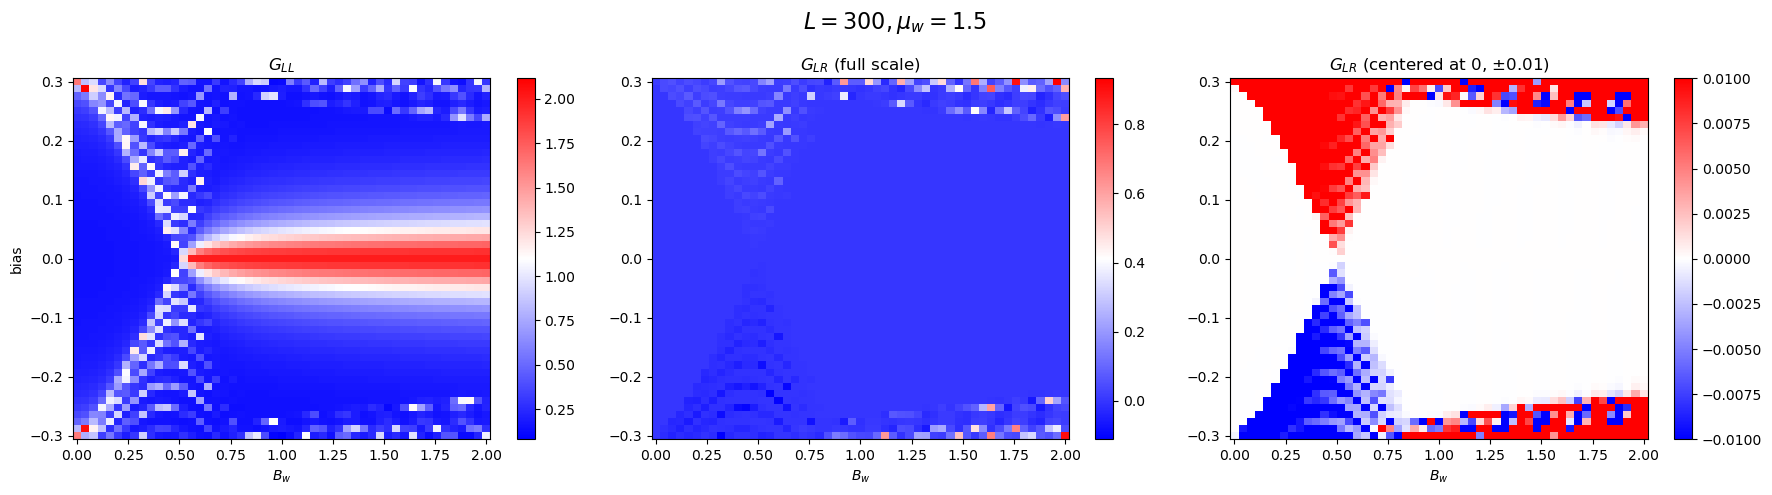

In [2]:
from full_system import*
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import time
Bw_range = np.linspace(0,2,51)
bias_range = np.linspace(-0.3,0.3,51)

conds_params = {
    "L": 300,
    "alpha": 5,
    "Bw": 1,
    "mu_w": 1.5,
    "tw": 27.2,

    "Bs": 0,
    "mu_s": 3,
    "ts": 6,
    "delta": 1,
    "T": 2
}

t1 = time.time()
GLL = np.zeros((len(Bw_range),len(bias_range)))
GLR = np.zeros((len(Bw_range),len(bias_range)))

for i in range(len(Bw_range)):
    for j in range(len(bias_range)):
        params = conds_params.copy()
        params["Bw"] = Bw_range[i]
        system = sys_conds(params).finalized()
        GLL[i][j], GLR[i][j] = cal_conds(system,bias_range[j])

t2 = time.time()
print(t2-t1)


def plot_cond(x, y, GLL, GLR):
    X, Y = np.meshgrid(x, y)
    Z1 = np.array(GLL).T
    Z2 = np.array(GLR).T

    plt.figure(figsize=(18, 5))
    plt.suptitle(f"$L={params["L"]},\\mu_w={params["mu_w"]}$", fontsize=16)

    # --- GLL ---
    plt.subplot(1, 3, 1)
    plt.pcolormesh(X, Y, Z1, cmap='bwr', shading='auto')
    plt.xlabel('$B_w$')
    plt.ylabel('bias')
    plt.title("$G_{LL}$")
    plt.colorbar()

    # --- GLR (full scale) ---
    plt.subplot(1, 3, 2)
    plt.pcolormesh(X, Y, Z2, cmap='bwr', shading='auto')
    plt.xlabel('$B_w$')
    plt.title("$G_{LR}$ (full scale)")
    plt.colorbar()

    # --- GLR (restricted range, centered at 0) ---
    plt.subplot(1, 3, 3)
    norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=0.01)
    plt.pcolormesh(X, Y, Z2, cmap='bwr', shading='auto', norm=norm)
    plt.xlabel('$B_w$')
    plt.title("$G_{LR}$ (centered at 0, ±0.01)")
    plt.colorbar()

    plt.tight_layout()
    plt.show()

plot_cond(Bw_range, bias_range, GLL, GLR)

# $\mu$,bias

26.812185525894165


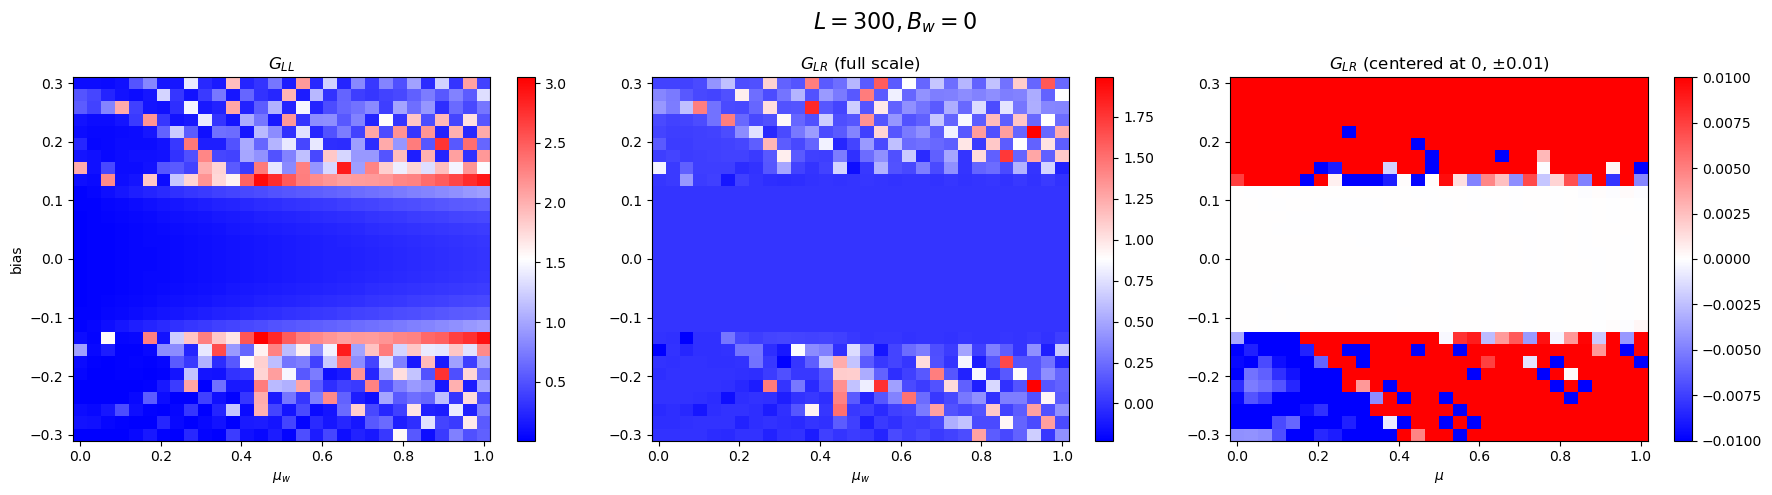

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from full_system import*
import time

mu_w_range = np.linspace(0, 1, 30)
bias_range = np.linspace(-0.3, 0.3, 30)

conds_params = {
    "L": 300,
    "alpha": 0.8,
    "Bw": 0,
    "mu_w": 0.5,
    "tw": 12,

    "Bs": 0,
    "mu_s": 0.4,
    "ts": 6,
    "delta": 1,
    "T": 0.4
}

t1 = time.time()
GLL = np.zeros((len(mu_w_range),len(bias_range)))
GLR = np.zeros((len(mu_w_range),len(bias_range)))


for i in range(len(mu_w_range)):
    for j in range(len(bias_range)):
        params = conds_params.copy()
        params["mu_w"] = mu_w_range[i]
        system = sys_conds(params).finalized()
        GLL[i][j], GLR[i][j] = cal_conds(system,bias_range[j])

t2 = time.time()
print(t2-t1)


def plot_cond(x, y, GLL, GLR):
    X, Y = np.meshgrid(x, y)
    Z1 = np.array(GLL).T
    Z2 = np.array(GLR).T

    plt.figure(figsize=(18, 5))
    plt.suptitle(f"$L={params["L"]},B_w={params["Bw"]}$", fontsize=16)

    # --- GLL ---
    plt.subplot(1, 3, 1)
    # norm = mcolors.Normalize(vmin=0, vmax=np.max(Z1))
    plt.pcolormesh(X, Y, Z1, cmap='bwr', shading='auto')
    plt.xlabel('$\\mu_w$')
    plt.ylabel('bias')
    plt.title("$G_{LL}$")
    plt.colorbar()

    # --- GLR (full scale) ---
    plt.subplot(1, 3, 2)
    plt.pcolormesh(X, Y, Z2, cmap='bwr', shading='auto')
    plt.xlabel('$\\mu_w$')
    plt.title("$G_{LR}$ (full scale)")
    plt.colorbar()

    # --- GLR (restricted range, centered at 0) ---
    plt.subplot(1, 3, 3)
    norm = mcolors.TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=0.01)
    plt.pcolormesh(X, Y, Z2, cmap='bwr', shading='auto', norm=norm)
    plt.xlabel('$\\mu$')
    plt.title("$G_{LR}$ (centered at 0, ±0.01)")
    plt.colorbar()

    plt.tight_layout()
    plt.show()


plot_cond(mu_w_range,bias_range,GLL,GLR)

# B，mu conds

13.108317375183105


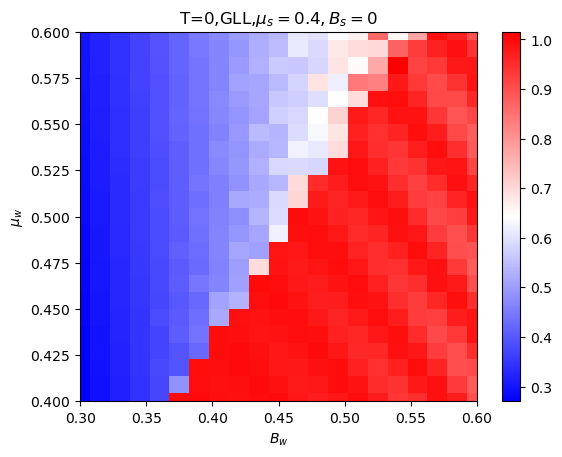

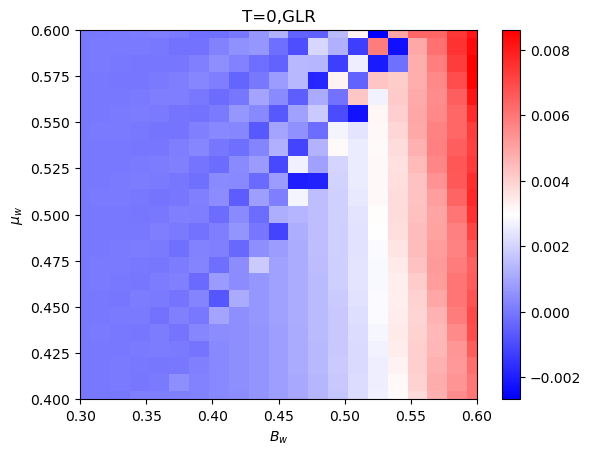

In [7]:
from full_system import*
import time


B_w_range = np.linspace(0.3, 0.6, 21)
mu_w_range = np.linspace(0.4, 0.6, 23)

GLL = np.zeros((len(B_w_range),len(mu_w_range)))
GLR = np.zeros((len(B_w_range),len(mu_w_range)))

conds_params = {
    "L": 300,
    "alpha": 0.8,
    "Bw": 0.4,
    "mu_w": 0.4,
    "tw": 12,

    "Bs": 0,
    "mu_s": 0.4,
    "ts": 6,
    "delta": 1,
    "T": 0.4
}
t1 = time.time()
for i in range(len(B_w_range)):
    for j in range(len(mu_w_range)):
        params = conds_params.copy()
        params["Bw"] = B_w_range[i]
        params["mu_w"] = mu_w_range[j]
        system = sys_conds(params).finalized()
        GLL[i][j], GLR[i][j] = cal_conds(system,0)

t2 = time.time()
print(t2-t1)

def plot_cond(x,y,G,title):
    X, Y = np.meshgrid(x, y)
    Z = np.array(G).T  
    plt.figure()
    plt.pcolormesh(X, Y, Z, cmap='bwr', shading='auto') 
    plt.title(title)
    plt.xlabel('$B_w$')
    plt.ylabel('$\\mu_w$')

    plt.xlim(np.min(x),np.max(x))
    plt.ylim(np.min(y),np.max(y))
    cbar = plt.colorbar()
    plt.show()

plot_cond(B_w_range,mu_w_range,GLL/2,f'T=0,GLL,$\\mu_s={conds_params["mu_s"]},B_s={conds_params["Bs"]}$')
plot_cond(B_w_range,mu_w_range,GLR/2,'T=0,GLR')